<div width=50% style="display: block; margin: auto">
    <img src="figures/ucl-logo.svg" width=100%>
</div>

### [UCL-ELEC0136 Data Acquisition and Processing Systems 2024]()
University College London
# Lab 3: Data Processing #1


In this lab, we will use the _open-meteo_ API (https://open-meteo.com/), to acquire historical weather data for London from the past 2 years, inspect it, and prepare it for modelling.

### Objectives
* Learn to deal with **time series**
* Learn to **plot** and represent data
* **Normalise** your data
* Detect and handle **outliers** in time series

### Constraints
* You cannot use pre-existing functions to normalise your data or calculate statistics about it.
* This includes functions from `scipy`, `pandas` and other statistics library.
* This doesn't mean you cannot use `pandas`, but that you cannot use its stats functions (e.g., functions to calculate percentile)
* You must you `numpy` only to manipulate your data
* All data must be acquired through Python: you cannot download the data by browsing to the website and using the mouse 

<hr width=70% style="float: left">

### TASKS

<div class="alert alert-block alert-danger">
<h4>👩‍💻👨‍💻 TASK 1: Acquiring data</h4>

* Create a function `acquire_data(latitude, longitude, start_date, end_date, features)` that acquires **daily** data for **London** between the **1st January 1950** and the **31st December 1954** (included)
* We are interested in the following **features**:
  * Mean Temperature (2 m)
  * Minimum Temperature (2 m)
  * Maximum Temperature (2 m)
  * Precipitation Sum
</div>

<div class="alert alert-heading alert-danger" style="background-color: white; border: 2px solid; border-radius: 5px; color: #000; border-color:#AAA; padding: 10px">
    <b>💎 Tip</b>

* Use a WEB request to acquire the data (like for lab 1), the API endpoint is https://archive-api.open-meteo.com/v1/archive
* Take a look at the open-meteo docs https://open-meteo.com/en/docs/historical-weather-api to see which parameters to use
* Always specify a timezone (you can use `timezone=GMT`)

</div>


In [4]:
from typing import List
import requests
import json

# create a function
def acquire_data(latitude: float, longitude: float, start_date: str, end_date: str, features: List[str]) -> dict:
    """
    Acquires data from the Open-meteo API for a given location and time period.
    The API endpoint is https://archive-api.open-meteo.com/v1/archive.

    Args:
        latitude (float): latitude of the location
        longitude (float): longitude of the location
        start_date (str): start date of the data in the format YYYY-MM-DD
        end_date (str): end date of the data in the format YYYY-MM-DD
        features (List[str]): list of features to be extracted from the API
    Returns:
        (dict): dictionary of data
    """
    query="https://archive-api.open-meteo.com/v1/archive"
    features=",".join(features)
    #print(features)
    params={
      "latitude": latitude,
      "longitude":longitude,
      "start_date":start_date,
      "end_date":end_date,
      "daily": features,
      "timezone": "GMT"
    }

    response = requests.get(query, params=params)
     # check if the response was successful and raise an exception if not
    response.raise_for_status()

    print("Response status code:", response.status_code)
    
    repositories = response.json()

    return repositories

    # add your code here

<div class="alert alert-block alert-danger">
<h4>👩‍💻👨‍💻 TASK 2: Handling data</h4>

* Run the function above to acquire the data
* Create a pandas dataframe from the acquired data
</div>

In [129]:
# add your code here
import pandas as pd

latitude=51.5072
longitude=0.1276
start_date='1950-01-01'
end_date="1954-12-31"
features=["temperature_2m_mean","temperature_2m_min","temperature_2m_max","precipitation_sum"]

result_data=acquire_data(latitude,longitude,start_date,end_date,features)
#print(result_data)

result_df = pd.DataFrame(result_data["daily"])

result_df



Response status code: 200


,time,temperature_2m_mean,temperature_2m_min,temperature_2m_max,precipitation_sum
0,1950-01-01,1.5,-1.6,4.2,0.0
1,1950-01-02,6.8,0.1,10.5,0.0
2,1950-01-03,10.5,10.1,11.2,1.7
3,1950-01-04,9.4,8.1,10.6,0.0
4,1950-01-05,8.2,6.0,9.5,2.7
...,...,...,...,...,...
1821,1954-12-27,7.2,5.7,9.3,0.0
1822,1954-12-28,7.0,5.0,9.0,0.0
1823,1954-12-29,7.5,6.5,8.8,0.1
1824,1954-12-30,6.5,5.4,7.7,0.0


<div class="alert alert-block alert-danger">
<h4>👩‍💻👨‍💻 TASK 3: Plot your data</h4>

* Create a function `lineplot(x, y, title, x_label, y_label)` that creates a lineplot for the feature named `feature_name` and returns both the `Figure` and the `Axis` objects
* The function must return both the matplotlib `figure` object and the `axis` object
* Use the function to create two images containing plots of both the temperature and precipitations and save them to disk
</div>

<div class="alert alert-heading alert-danger" style="background-color: white; border: 2px solid; border-radius: 5px; color: #000; border-color:#AAA; padding: 10px">
    <b>💎 Tip</b>

* Use `matplotlib` to create the plots
* Use the appropriate type of plot for the data that you want to visualise
* For example, you can use a lineplot to plot the average temperature
* Or, you can use a candlestick plot a shaded areaplot to plot min, max, and average temperature in the same figure

</div>


(0.0, 1825.0)

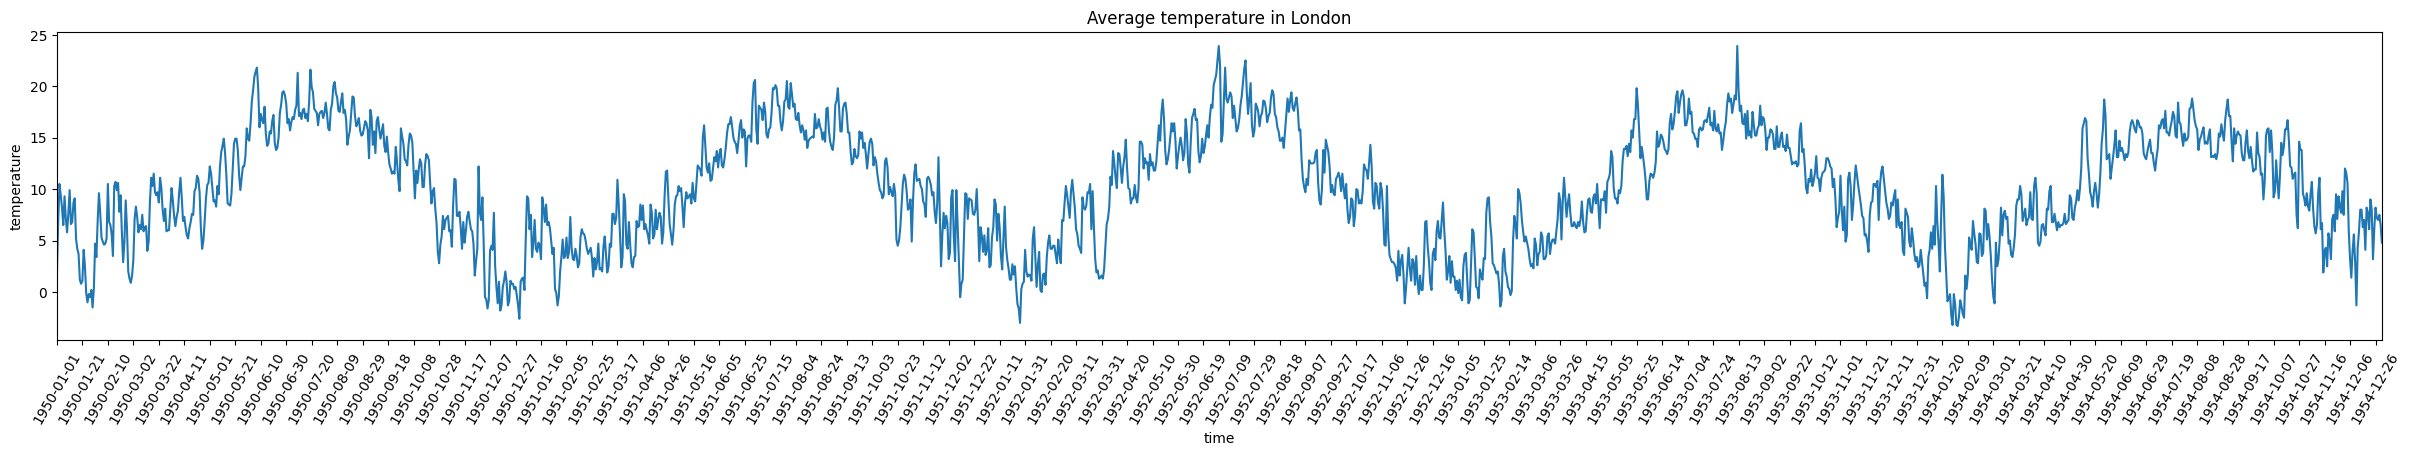

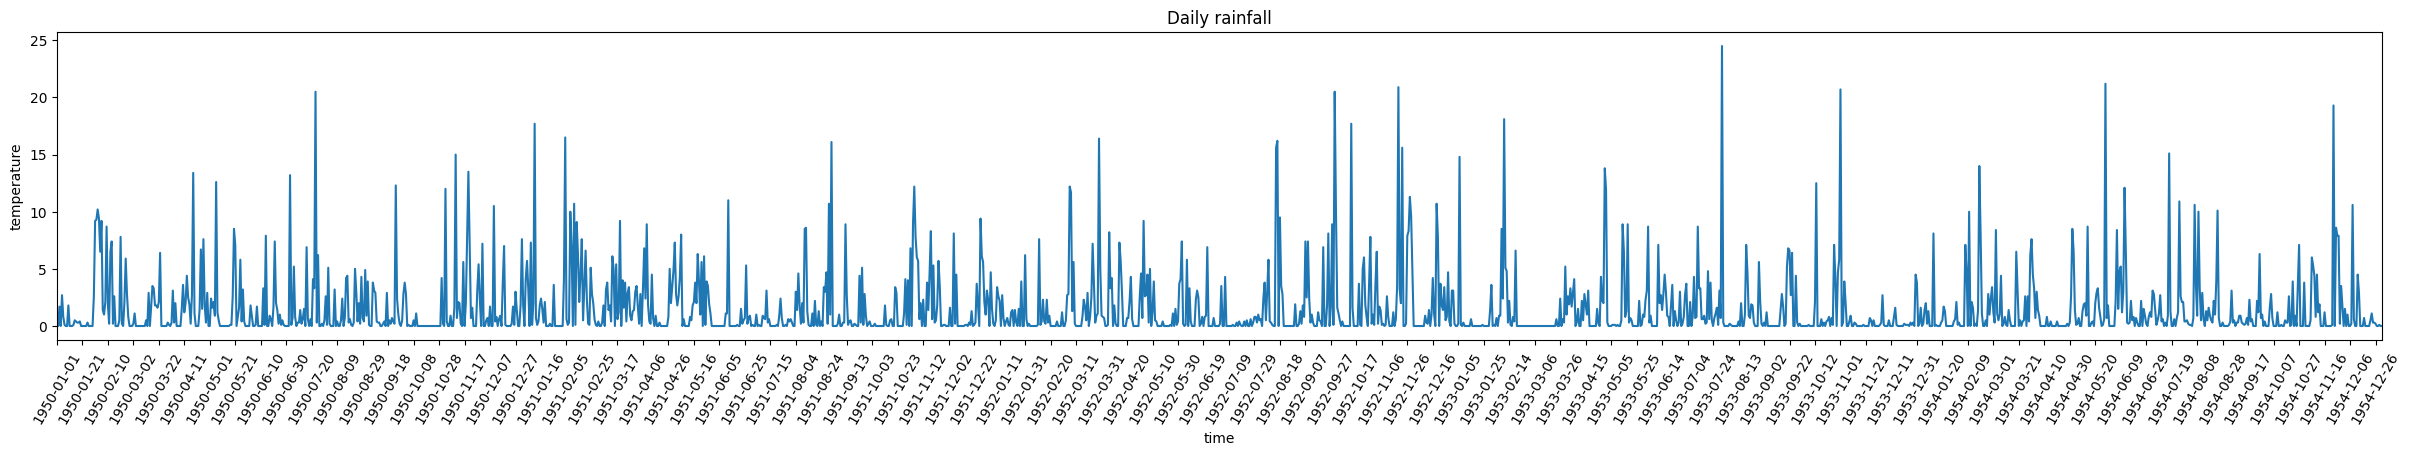

In [111]:
from numpy.typing import ArrayLike
import matplotlib.pyplot as plt


def lineplot(x: ArrayLike, y: ArrayLike, title: str, x_label: str, y_label: str) -> (plt.Figure, plt.Axes):
    """
    Creates a line plot for the given data, title and labels.

    Args:
        x (ArrayLike): value of the data on the x-axis
        y (ArrayLike): value of the data on the y-axis
        title (str): title of the plot
        x_label (str): x-axis label
        y_label (str): y-axis label
    Returns:
        (plt.Figure, plt.Axes): matplotlib figure and axes objects
    """

    fig, ax= plt.subplots(1,figsize=(30,4))
    ax.plot(x,y)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)
    ax.set_xticks(x[::20],x[::20],rotation=60)

    return fig, ax

   
    # add your code here
y_mean=result_df["temperature_2m_mean"]  
x=result_df["time"] 
#x= pd.to_datetime(result_df['time'])
title="Average temperature in London"
x_label="time"
y_label="temperature"
fig, ax=lineplot(x,y_mean,title,x_label,y_label)
ax.set_xlim("1950-01-01","1954-12-31")
rain=result_df["precipitation_sum"]
fig1, ax1=lineplot(x,rain,"Daily rainfall",x_label,y_label)
ax1.set_xlim("1950-01-01","1954-12-31")


<div class="alert alert-block alert-warning">
<h4>👩‍💻👨‍💻 [Optional] TASK 3.1: multivariate plots</h4>

* Create a function `lineplots(x, ys, title, x_label, y_label, legend)` that plot the two variables on the same graph and returns both the `Figure` and the `Axis` objects
* Add a legend
</div>

In [5]:
def lineplots(x: ArrayLike, ys: List[ArrayLike], title: str, x_label: str, y_label: str, legend: List[str]) -> (plt.Figure, plt.Axes):
    """
    Creates a line plot for each list of data in the given list of data, title and labels.

    Args:
        x (ArrayLike): value of the data on the x-axis
        ys (List[ArrayLike]): list of values of the data on the y-axis
        title (str): title of the plot
        x_label (str): x-axis label
        y_label (str): y-axis label
        legend (List[str]): list of legend labels
    Returns:
        (plt.Figure, plt.Axes): matplotlib figure and axes objects
    """
    fig, ax= plt.subplots(1,figsize=(30,4))
    for y in ys:
     ax.plot(x,y)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)
    ax.set_xticks(x[::20],x[::20],rotation=60)

    return fig, ax

    
    return plt.figure, plt.axes
    # add your code here

<div class="alert alert-block alert-warning">
<h4>👩‍💻👨‍💻 [Optional] TASK 3.2: Plot with additional statistics</h4>

* Create a shaded area plot, where the mean temperature is the central line, and the minimum, and the maximum are the lower and upper bounds of the shaded area.
* The function should return both the `Figure` and the `Axis` objects
* The shaded area must be 0.3 opacity
* See https://swdevnotes.com/python/2020/display-line-chart-range/ for an example output
</div>

<div class="alert alert-heading alert-danger" style="background-color: white; border: 2px solid; border-radius: 5px; color: #000; border-color:#AAA; padding: 10px">
    <b>💎 Tip</b>

* You can modify existing plots by reusing the `axis`
* For example, running `ax.plot` on an axis that already contains another plot, adds a plot on top of it

</div>


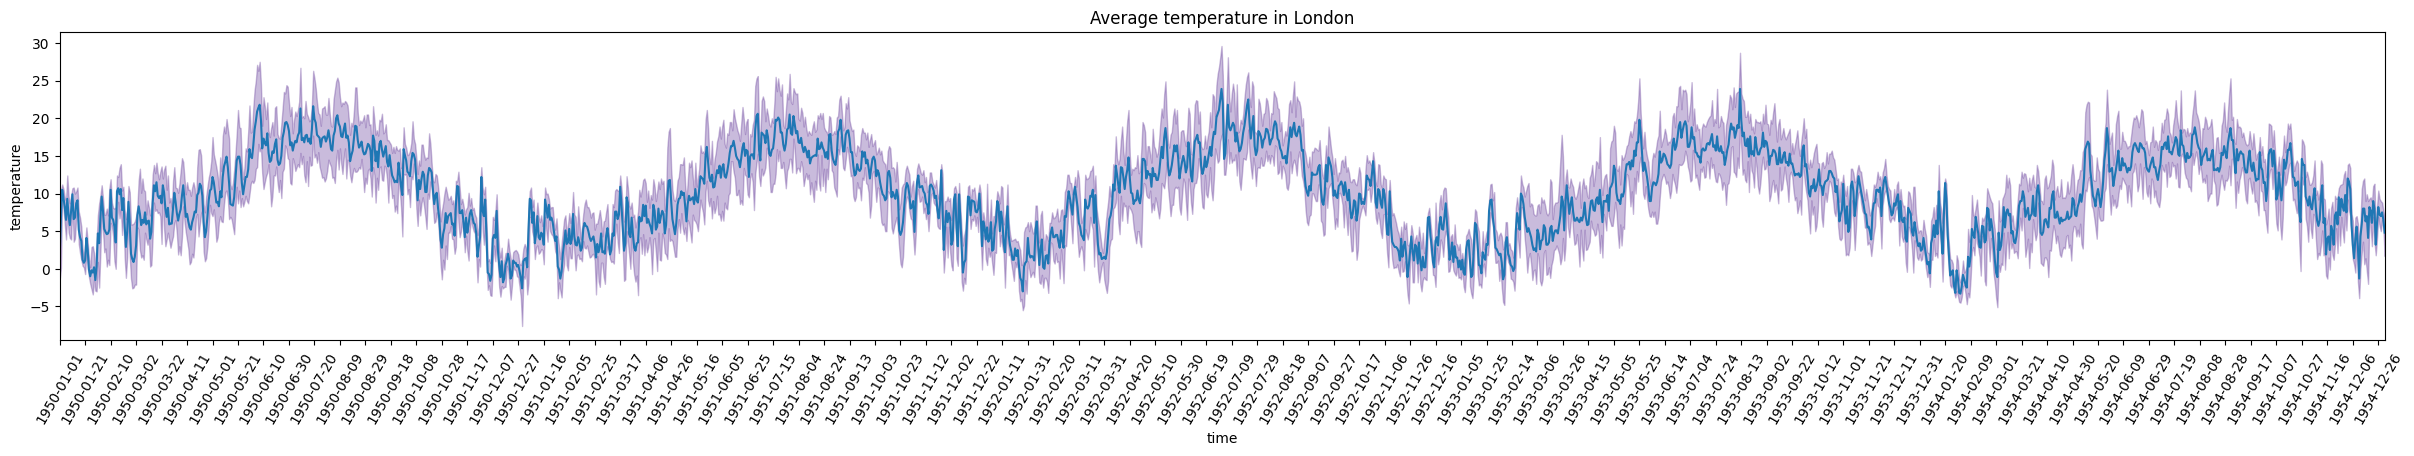

In [140]:
# add your code here
#x=result_df["time"] 

y_mean=result_df["temperature_2m_mean"]
y_max=result_df["temperature_2m_max"]
y_min=result_df["temperature_2m_min"]
x=result_df["time"] 
#x= pd.to_datetime(result_df['time'])

ys=[y_mean,y_max,y_min]

title="Average temperature in London"
x_label="time"
y_label="temperature"
legend=[]

#fig, axis=lineplots(x,ys,title,x_label,y_label,legend)

fig, ax=lineplot(x,y_mean,title,x_label,y_label)
#fig, ax=lineplot(x,y_max,title,x_label,y_label)
#fig, ax=lineplot(x,y_min,title,x_label,y_label)
ax.set_xlim("1950-01-01","1954-12-31")
clr = plt.cm.Purples(0.9)
ax.fill_between(x, y_min, y_max, alpha=0.3, edgecolor=clr, facecolor=clr)






#TK = plt.gca()
#TK.spines['right'].set_visible(False)
#TK.spines['top'].set_visible(False)

<div class="alert alert-block alert-danger">
<h4>👩‍💻👨‍💻 TASK 4: Normalising your data</h4>

* Create a function `minmax_norm(x)` that takes the acquired data, normalises the data using Min-Max normalisation only using `numpy`
* The function should returns an array containing the normalised data
* Normalise the `temperature_2m_mean` feature
* Plot the normalised data over the non-normalised one in the same plot
</div>

(0.0, 1825.0)

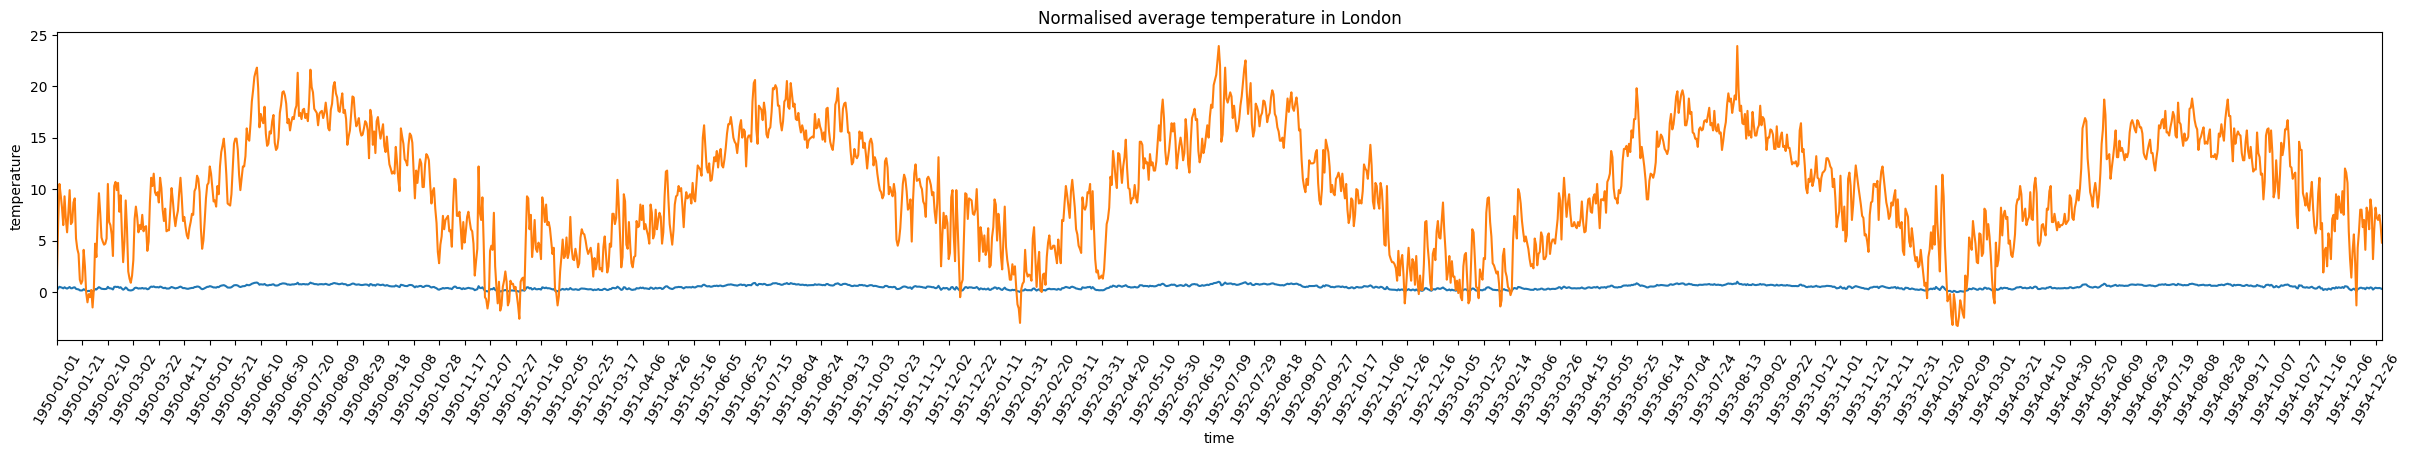

In [18]:
import numpy as np


def minmax_norm(x: ArrayLike) -> ArrayLike:
    """
    Normalises the data between 0 and 1 using the min-max normalization.

    Args:
        x (ArrayLike): data to be normalized
    Returns:
        (ArrayLike): normalized data
    """
    new_min=0.0
    new_max=1.0
    x_min=np.min(x)
    x_max=np.max(x)
    
    nom_data=[]
    for xi in x:
      nom_data.append(new_min+(xi-x_min)*(new_max-new_min)/(x_max-x_min))
    
    return nom_data
    # add your code here


new_mean=minmax_norm(result_df["temperature_2m_mean"])
x=result_df["time"] 
y_mean=result_df["temperature_2m_mean"]
title="Normalised average temperature in London"
x_label="time"
y_label="temperature"
fig, ax=lineplot(x,new_mean,title,x_label,y_label)
ax.plot(x,y_mean)
ax.set_xlim("1950-01-01","1954-12-31")

<div class="alert alert-block alert-warning">
<h4>👩‍💻👨‍💻 [Optional] TASK 4.1: Z-score normalisation</h4>

* Create a function `zscore_norm(x)` that takes a pandas series and normalises it using the z-score.
* The function should returns an array containing the normalised data
* Normalise the `temperature_2m_mean` feature
* Plot the normalised data over the non-normalised one in the same plot
</div>

(0.0, 1825.0)

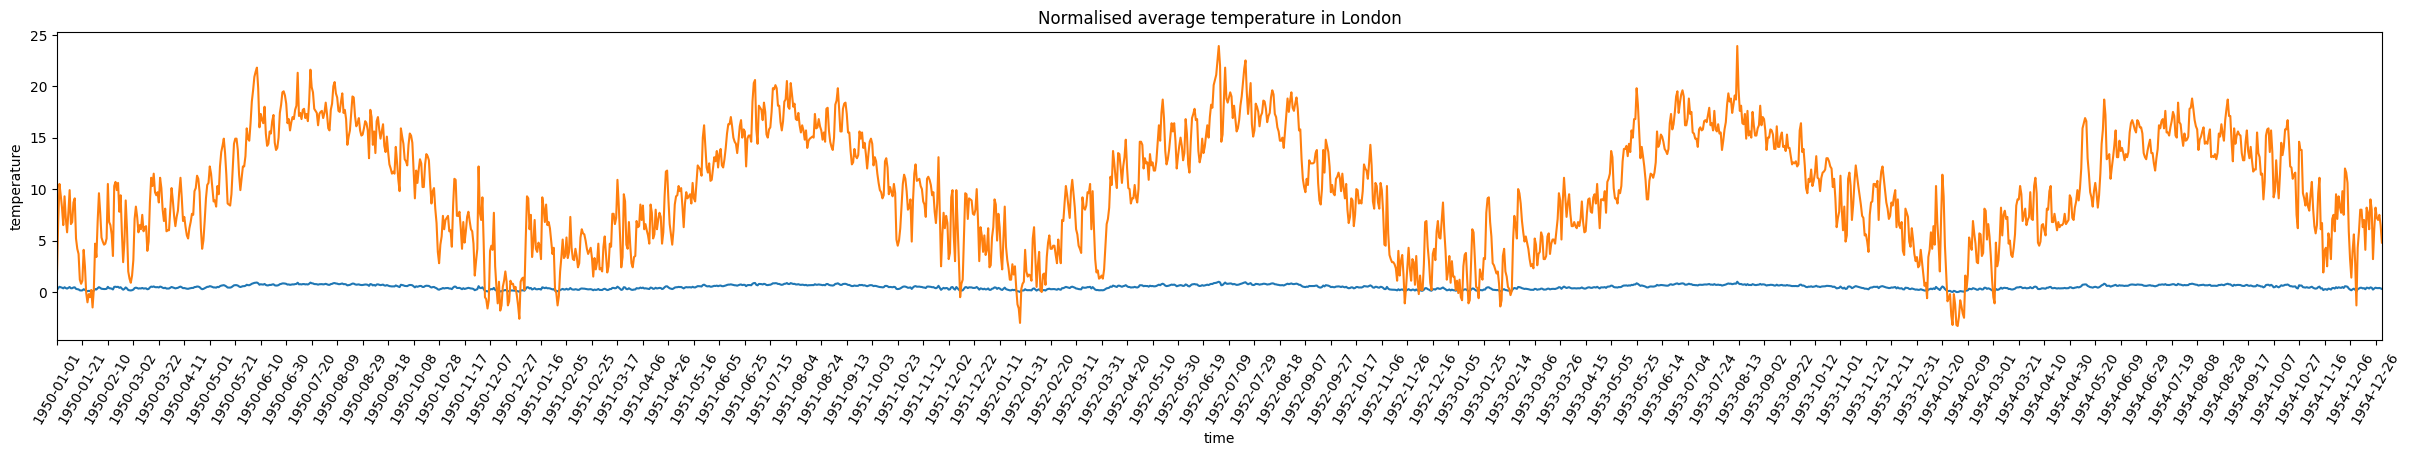

In [85]:
def zscore_norm(x: ArrayLike) -> ArrayLike:
    """
    Normalises the data using the z-score normalization.

    Args:
        x (ArrayLike): data to be normalized
    Returns:
        (ArrayLike): normalized data
    """
    # add your code here
    mean=np.mean(x)
    std=np.std(x)
    
    nom_data=[]
    for xi in x:
      nom_data.append((xi-mean)/std)
    
    return nom_data
    # add your code here


new_mean=minmax_norm(result_df["temperature_2m_mean"])
x=result_df["time"] 
y_mean=result_df["temperature_2m_mean"]
title="Normalised average temperature in London"
x_label="time"
y_label="temperature"
fig, ax=lineplot(x,new_mean,title,x_label,y_label)
ax.plot(x,y_mean)
ax.set_xlim("1950-01-01","1954-12-31")

<div class="alert alert-block alert-danger">
<h4>👩‍💻👨‍💻 TASK 5: Outliers detection</h4>

* Create a function `zscore_outliers(x, threshold=3)` that takes the acquired data, checks if each data point is an outliers by verifying that its z-score is greater than `threshold`
* The function must return the index of the outliers
* Check for outliers in `temperature_2m_mean`
</div>

In [112]:
def zscore_outliers(x: ArrayLike, threshold: int=2) -> ArrayLike:
    """
    Detects outliers using the z-score method and returns the indices of the outliers.

    Args:
        x (ArrayLike): data to be checked for outliers
        threshold (int): threshold for the z-score method

    Returns:
        (ArrayLike): indices of the outliers
    """
    mean=np.mean(x)
    std=np.std(x)
    #print (std)
    
    outlier=[]

    for i in range(len(x)):
        z_score=(x[i]-mean)/std
        if abs(z_score)>threshold:
            outlier.append(i)

    #outlier=np.where((x-mean)/std>threshold)
    return outlier

out_index=zscore_outliers(result_df["temperature_2m_mean"])
print(out_index)
    # add your code here
    

[24, 28, 156, 157, 189, 199, 338, 346, 348, 349, 354, 362, 363, 393, 754, 755, 756, 910, 911, 912, 913, 917, 932, 933, 1058, 1108, 1133, 1319, 1487, 1488, 1490, 1491, 1492, 1493, 1495, 1496, 1497, 1521, 1805]


<div class="alert alert-block alert-warning">
<h4>👩‍💻👨‍💻 [Optional] TASK 5.1: Plotting outliers</h4>

* Create a function `mark_outliers(ax, idx)` that marks the outliers with a red dot
* The function should return the `Figure` and the `Axis` object containing the plot
* Plot the data with the marked outliers
</div>

<Axes: title={'center': 'Average temperature in London'}, xlabel='time', ylabel='temperature'>

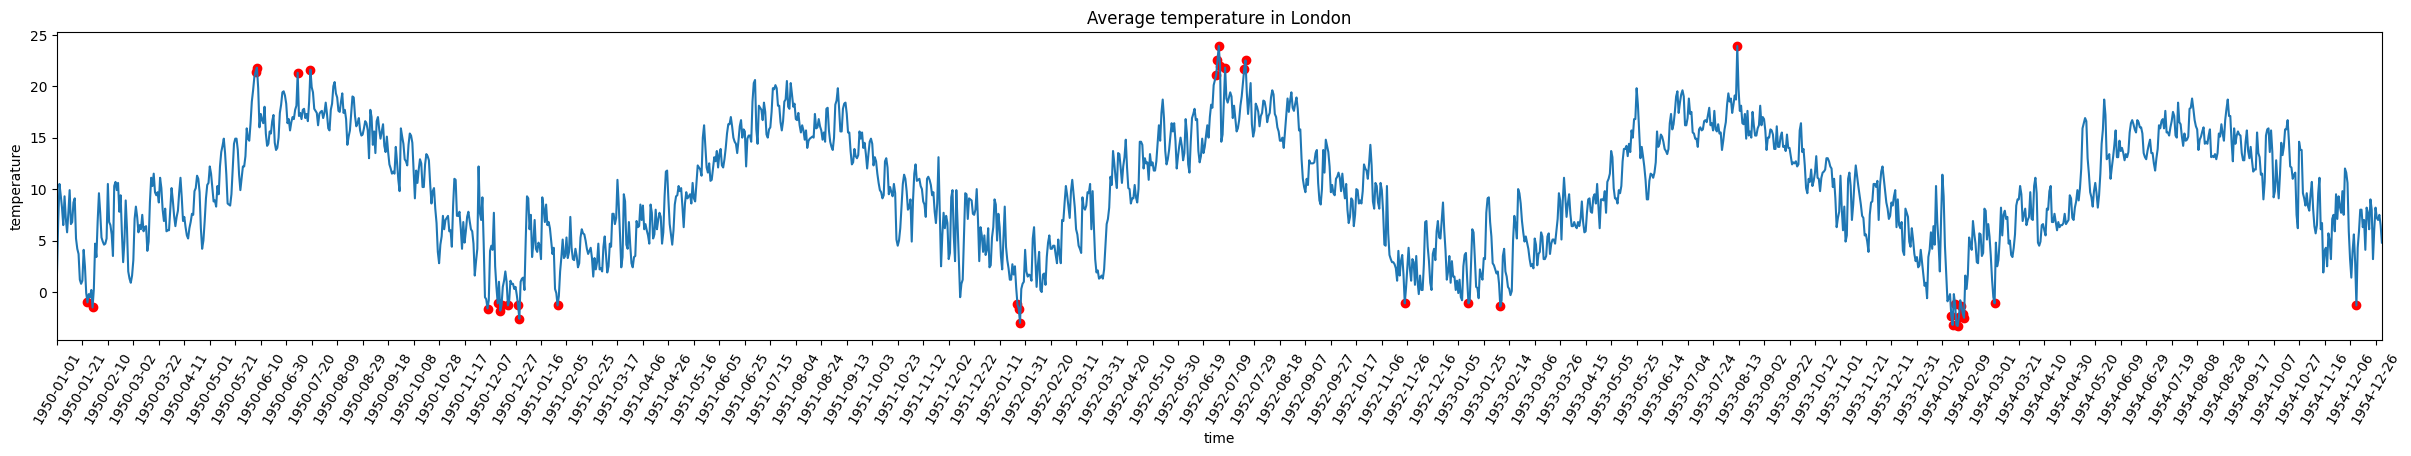

In [133]:
def mark_outliers(ax: plt.Axes, x: ArrayLike, y: ArrayLike, outliers_idx: ArrayLike) -> plt.Axes:
    """
    Plots red circles around the outliers in a certain line plot.

    Args:
        ax (plt.Axis): the older axis to plot on that contains the original line plot
        x (ArrayLike): the x-data for the line plot
        y (ArrayLike): the y-data for the line plot
        outliers_idx (ArrayLike): indices of the outliers
    """
    # add your code here
    for idx in outliers_idx:
      ax.scatter(x[idx], y[idx], c='red', marker='o')
    return ax


y_mean=result_df["temperature_2m_mean"]  
idx=zscore_outliers(y_mean)
x=result_df["time"] 
#x= pd.to_datetime(result_df['time'])
title="Average temperature in London"
x_label="time"
y_label="temperature"
fig, ax_out=lineplot(x,y_mean,title,x_label,y_label)
ax_out.set_xlim("1950-01-01","1954-12-31")
mark_outliers(ax_out,x,y_mean,idx)

<div class="alert alert-block alert-warning">
<h4>👩‍💻👨‍💻 [Optional] TASK 5.3: Detect outliers using the IQR method </h4>

* Create a function `iqr_detect(x, threshold=1.5)` that returns the indices of the outliers in the original data according to the **IQR** method
* Plot the data with the marked outliers
</div>

<div class="alert alert-heading alert-danger" style="background-color: white; border: 2px solid; border-radius: 5px; color: #000; border-color:#AAA; padding: 10px">
    <b>💎 Tip</b>

* You can use `np.quantile` to get the quantile of a uniform, discrete distrbution

</div>


<Axes: title={'center': 'Average temperature in London'}, xlabel='time', ylabel='temperature'>

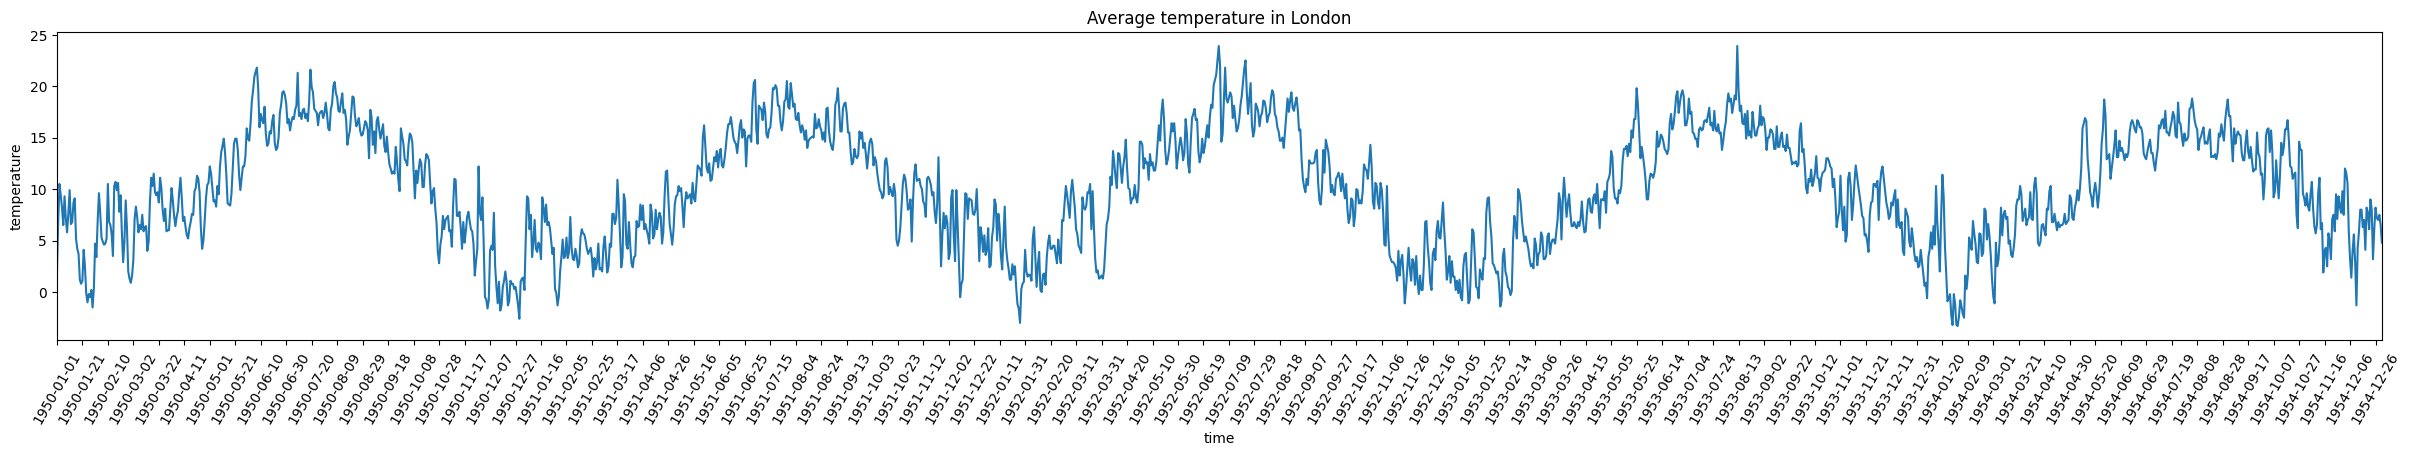

In [132]:
def iqr_detect(x: ArrayLike, threshold: float=1.5) -> ArrayLike:
    """
    Detects outliers using the interquantile range method and returns the indices of the outliers.

    Args:
        x (ArrayLike): data to be checked for outliers
        threshold (float): threshold for the interquantile range method

    Returns:
        (ArrayLike): indices of the outliers
    """
    # add your code here
    q1=np.quantile(x,0.25)
    q3=np.quantile(x,0.75)
    iqr=abs(q3-q1)
    #print(q1,q3,iqr)

    outlier=[]

    for i in range(len(x)):
        if x[i]<q1-threshold*iqr or x[i]>q3+threshold*iqr:
            outlier.append(i)
    #print(outlier)
    return (outlier)

y_mean=result_df["temperature_2m_mean"]  
iqr_idx=iqr_detect(y_mean)
x=result_df["time"] 
#x= pd.to_datetime(result_df['time'])
title="Average temperature in London"
x_label="time"
y_label="temperature"
fig, ax_iqr=lineplot(x,y_mean,title,x_label,y_label)
ax_iqr.set_xlim("1950-01-01","1954-12-31")
mark_outliers(ax_iqr,x,y_mean,iqr_idx)
    

<div class="alert alert-block alert-danger">
<h4>👩‍💻👨‍💻 TASK 6: Clamping outliers</h4>

* One way to deal with outliers is to compress them into a range of acceptable values
* Create a function `zscore_clamp(x, threshold=3)` that clamps the outliers into the range between 10th percentile and 90th percentile
* The function should return a numpy array containing the clamped data
* Plot the non-clamped data over the clamped one
  
</div>

<div class="alert alert-heading alert-danger" style="background-color: white; border: 2px solid; border-radius: 5px; color: #000; border-color:#AAA; padding: 10px">
    <b>💎 Tip</b>

* Not every outlier is bad!! For example in financial problems, such as stock prediction, outliers is **exactly** what you are looking for
* **Removing outliers in that case might not benefit our analysis**
* Always make an **informed** decision whether to remove outliers and always **justify** it

</div>


(0.0, 1825.0)

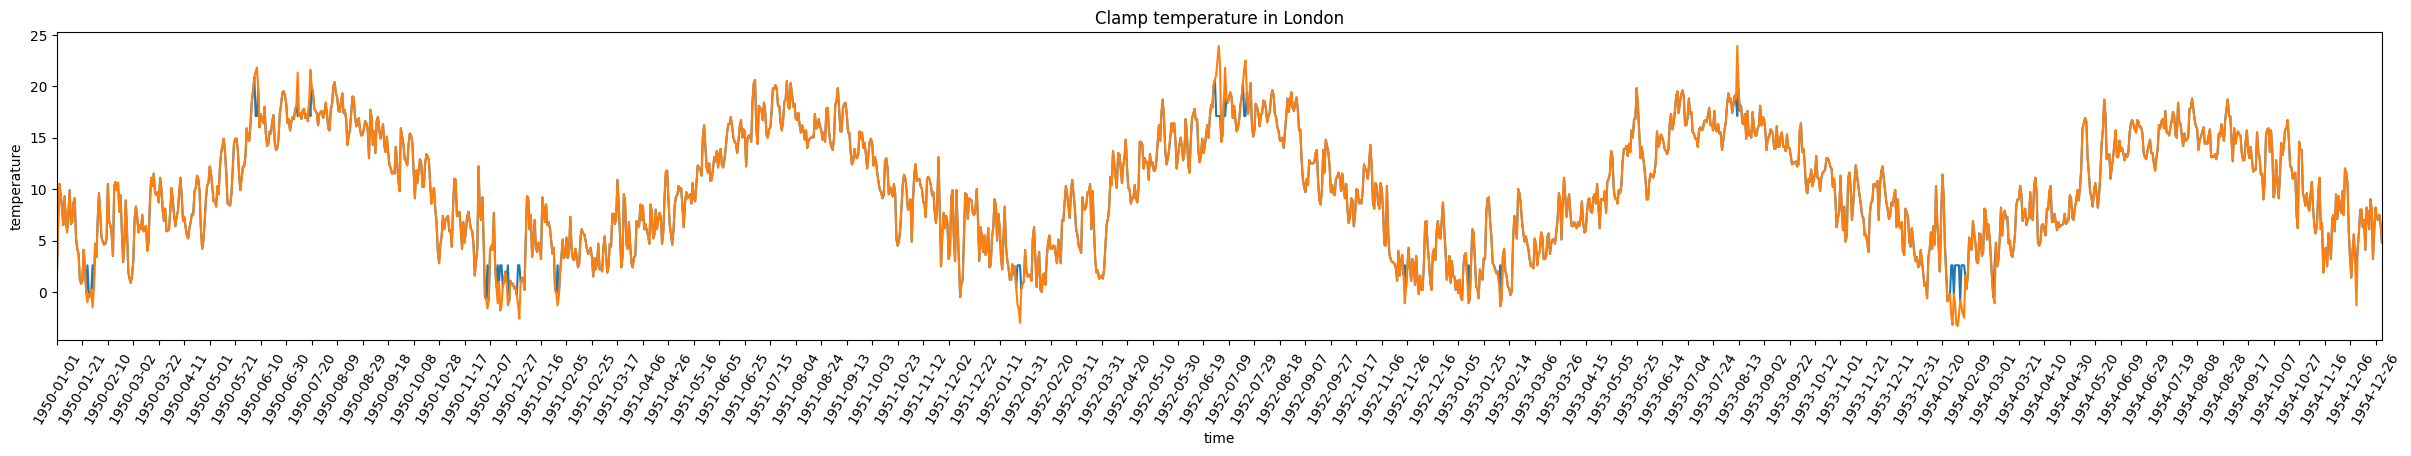

In [134]:
def zscore_clamp(x: ArrayLike, threshold: int=2) -> ArrayLike:
    """
    Clamps outliers using the z-score method and returns the clamped data.

    Args:
        x (ArrayLike): data to be clamped
        threshold (int): threshold for the z-score method

    Returns:
        (ArrayLike): clamped data
    """
    mean=np.mean(x)
    std=np.std(x)
    q10=np.quantile(x,0.1)
    q90=np.quantile(x,0.9)

    
    new_X=[]
    for i in range(len(x)):
        z_score=(x[i]-mean)/std
        if abs(z_score)>threshold:
           if x[i]>mean:
               new_X.append(q90)
           else:
               new_X.append(q10)
        else:
            new_X.append(x[i])   

    return new_X

y_mean=result_df["temperature_2m_mean"]  
clamp_data=zscore_clamp(y_mean)
x=result_df["time"] 
title="Clamp temperature in London"
x_label="time"
y_label="temperature"
fig, ax_clamp=lineplot(x,clamp_data,title,x_label,y_label)
ax_clamp.plot(x,y_mean)
ax_clamp.set_xlim("1950-01-01","1954-12-31")
    # add your code here

<div class="alert alert-block alert-warning">
<h4>👩‍💻👨‍💻 [Optional] TASK 6.1: Replace outliers by n-degree interpolation </h4>

* Create a function `zscore_interp(x, time, threshold=3, deg=3)` that replaces the z-score outliers with values from a polynomial fit on clean data
* The function should return a numpy array containing the interpolated data
* Plot the data before and after replacing outliers
* Experiment with different value of `deg`, e.g., `1`, `3`, `11`, and `23`
</div>

<div class="alert alert-heading alert-danger" style="background-color: white; border: 2px solid; border-radius: 5px; color: #000; border-color:#AAA; padding: 10px">
    <b>💎 Tip</b>

* You can index a numpy array with another numpy array of boolean values
* This will return only the values at which the index is `True`
* Try using this method to get only the clean data (that without outliers)
</div>


C:\Users\koyisaa\AppData\Local\Temp\ipykernel_14480\1058255511.py:31: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(clear_x, clear_y, deg)


[24, 28, 156, 157, 189, 199, 338, 346, 348, 349, 354, 362, 363, 393, 754, 755, 756, 910, 911, 912, 913, 917, 932, 933, 1058, 1108, 1133, 1319, 1487, 1488, 1490, 1491, 1492, 1493, 1495, 1496, 1497, 1521, 1805]


(0.0, 1825.0)

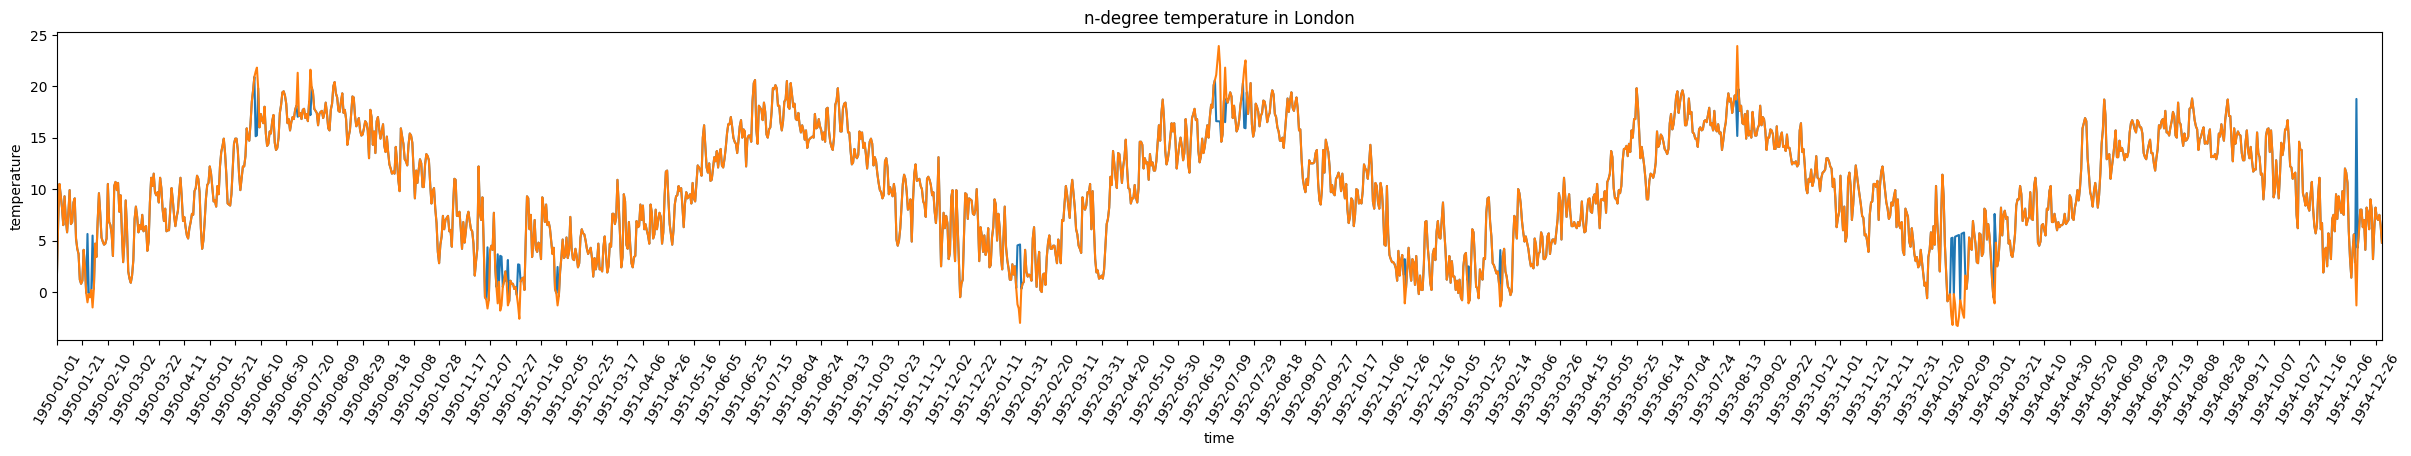

In [139]:
def zscore_interp(x: ArrayLike, y: ArrayLike, threshold: int=2, deg: int=23) -> ArrayLike:
    """
    Interpolates outliers using the z-score method and returns the interpolated data using a `deg`-degree approximation.

    Args:
        x (ArrayLike): x-variate of data to be interpolated
        y (ArrayLike): y-variate of data to be interpolated
        threshold (int): threshold for the z-score method
        deg (int): degree of the polynomial approximation

    Returns:
        (ArrayLike): interpolated data
    """
    # add your code here
    mean=np.mean(y)
    std=np.std(y)
    clear_x=[]
    clear_y=[]
    index=[]
    output=list(y)
    a=0
    for i in range(len(y)):
        z_score=(y[i]-mean)/std
        if abs(z_score)<=threshold:
            clear_x.append(a)   
            clear_y.append(y[i]) 
            a=a+1
        else:
            index.append(i)

    coefficients = np.polyfit(clear_x, clear_y, deg)
    fit_function = np.poly1d(coefficients)
    
    print(index)
    for i in index:
        output[i]=fit_function(i)
        
    return output

y_mean=result_df["temperature_2m_mean"]  
x=result_df["time"] 
title="n-degree temperature in London"
x_label="time"
y_label="temperature"
intro_data=zscore_interp(x,y_mean)
fig, ax_intro=lineplot(x,intro_data,title,x_label,y_label)
ax_intro.plot(x,y_mean)
ax_intro.set_xlim("1950-01-01","1954-12-31")
    